# DataFrame 합치기

In [ ]:
#필요한 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge

두 개의 DataFrame을 공통된 컬럼(들)을 기준으로 합치는 것. **SQL의 join**과 같은 동작기능.

In [ ]:
emp = pd.DataFrame(data={
    'empno':[100,101,200,201],
    'ename':['Scott','King','Allen','Tiger'],
    'deptno':[10,20,10,50]
})

In [ ]:
emp

,empno,ename,deptno
0,100,Scott,10
1,101,King,20
2,200,Allen,10
3,201,Tiger,50


In [ ]:
dept = pd.DataFrame(data={
    'deptno':[10,20,30],
    'dname':['HR','IT','Sales']
})

In [ ]:
dept

,deptno,dname
0,10,HR
1,20,IT
2,30,Sales


## inner join

merge(join)

* `pd.merge(df1, df2, how, on, ...)`함수
* `pd.DataFrame.merge(df,how,on, ...)`메서드
* `how`파라미터: merge(join) 방식. inner, left(outer), right(outer), outer
 * merge 방식의 기본값은 Inner. `how = inner`는 생략가능
* `on` 파라미터 : merge(join)의 기준이 되는 컬럼(컬럼들의 리스트).
 * merge하려는 2개의 DataFrame에서 컬럼이름이 동일한 경우에는 on 파라미터를 생략할 수 있음.

In [ ]:
pd.merge(emp, dept, how='inner', on='deptno') #함수

,empno,ename,deptno,dname
0,100,Scott,10,HR
1,200,Allen,10,HR
2,101,King,20,IT


In [ ]:
emp.merge(dept) #메서드

,empno,ename,deptno,dname
0,100,Scott,10,HR
1,200,Allen,10,HR
2,101,King,20,IT


## left (outer) join

In [ ]:
pd.merge(emp,dept, how='left')

,empno,ename,deptno,dname
0,100,Scott,10,HR
1,101,King,20,IT
2,200,Allen,10,HR
3,201,Tiger,50,NaN


## right(outer)join

In [ ]:
pd.merge(emp,dept, how='right')

,empno,ename,deptno,dname
0,100.0,Scott,10,HR
1,200.0,Allen,10,HR
2,101.0,King,20,IT
3,NaN,NaN,30,Sales


## full(outer) join

In [ ]:
pd.merge(emp,dept, how='outer')

,empno,ename,deptno,dname
0,100.0,Scott,10,HR
1,200.0,Allen,10,HR
2,101.0,King,20,IT
3,201.0,Tiger,50,NaN
4,NaN,NaN,30,Sales


##join의 기준이 되는 컬럼 이름이 다른 경우

In [ ]:
employees = pd.DataFrame(data={
    'empno':[100,101,200,201],
    'ename':['Scott','King','Allen','Tiger'],
    'deptno':[10,20,10,50]
    })
employees

,empno,ename,deptno
0,100,Scott,10
1,101,King,20
2,200,Allen,10
3,201,Tiger,50


In [ ]:
departments = pd.DataFrame(data={
    'dno':[10,20,30],
    'dname':['HR','IT','Sales']
})
departments

,dno,dname
0,10,HR
1,20,IT
2,30,Sales


In [ ]:
pd.merge(employees,departments, left_on='deptno', right_on='dno')

,empno,ename,deptno,dno,dname
0,100,Scott,10,10,HR
1,200,Allen,10,10,HR
2,101,King,20,20,IT


## 인덱스를 사용한 merge

In [ ]:
np.random.seed(1)

df1=pd.DataFrame(data={'val_1': np.random.randint(10, size=4),
                       'val_2': np.random.randint(100, size=4)},
                 index=['a','b','c','d'])
df1

,val_1,val_2
a,5,79
b,8,64
c,9,16
d,5,1


In [ ]:
df2=pd.DataFrame(data={'data_1': np.random.randn(4), #표준정규분포를 따르는 함수 4개
                       'data_2': np.random.randn(4)},
                 index=['d','b','c','a'])
df2

,data_1,data_2
d,-0.528172,1.744812
b,-1.072969,-0.761207
c,0.865408,0.319039
a,-2.301539,-0.249370


In [ ]:
pd.merge(df1, df2, left_index=True,right_index=True)
# 양쪽 데이터셋 모두 index 기준으로 JOIN

,val_1,val_2,data_1,data_2
a,5,79,-2.301539,-0.249370
b,8,64,-1.072969,-0.761207
c,9,16,0.865408,0.319039
d,5,1,-0.528172,1.744812


## 인덱스와 컬럼을 사용한 Merge

In [ ]:
df1

,val_1,val_2
a,5,79
b,8,64
c,9,16
d,5,1


In [ ]:
df3=pd.DataFrame(data={'name':['d','b','c','a'],
                       'data':np.random.randint(100,size=4)})

df3

,name,data
0,d,29
1,b,14
2,c,50
3,a,68


In [ ]:
pd.merge(df1,df3,left_index=True,right_on='name').reset_index(drop=True)
# 왼쪽은 index 로 right 는 열이름 기준으로 JOIN
# reset_index(): index를 데이터 프레임의 컬럼으로 만들고, 인덱스를 리셋.
# reset_index(drop=True) : 기존 인덱스를 삭제하고 리셋.

,val_1,val_2,name,data
0,5,79,a,68
1,8,64,b,14
2,9,16,c,50
3,5,1,d,29


In [ ]:
pd.merge(df1,df3,left_index=True,right_on='name').set_index('name')
# set_index(col_name): col_name을 인덱스로 설정.

,val_1,val_2,data
name,,,
a,5,79,68
b,8,64,14
c,9,16,50
d,5,1,29


# Concat

`pd.Series` 또는 `pd.DataFrmae`을 축(axis)을 따라서 합치는 방법.

## Series에서의 concat

In [ ]:
s1 = pd.Series(data=['a','b','c'])
s1

0    a
1    b
2    c
dtype: object

In [ ]:
s2 =pd.Series(data=['d','e'])
s2

0    d
1    e
dtype: object

In [ ]:
pd.concat([s1,s2],axis=0)
# axis=0은 생략 가능(default argument)

0    a
1    b
2    c
0    d
1    e
dtype: object

In [ ]:
pd.concat([s1,s2],ignore_index=True)

0    a
1    b
2    c
3    d
4    e
dtype: object

In [ ]:
pd.concat([s1,s2],axis=1) 
# Series 2개를 axis=1 방향으로 합치면 그 결과는 DataFrame.

,0,1
0,a,d
1,b,e
2,c,NaN


## DataFrame에서의 concat

In [ ]:
np.random.seed(1)

df1 = pd.DataFrame(data={'id':np.arange(1,6),
                         'kor':np.random.randint(100, size=5),
                         'eng':np.random.randint(100, size=5)})
df1

,id,kor,eng
0,1,37,5
1,2,12,79
2,3,72,64
3,4,9,16
4,5,75,1


In [ ]:
df2 = pd.DataFrame(data={'id':np.arange(6,11),
                         'kor':np.random.randint(100, size=5),
                         'eng':np.random.randint(100, size=5)})
df2

,id,kor,eng
0,6,76,20
1,7,71,18
2,8,6,84
3,9,25,11
4,10,50,28


In [ ]:
pd.concat([df1,df2],axis=0, ignore_index=True)

,id,kor,eng
0,1,37,5
1,2,12,79
2,3,72,64
3,4,9,16
4,5,75,1
5,6,76,20
6,7,71,18
7,8,6,84
8,9,25,11
9,10,50,28


In [ ]:
df3 = pd.DataFrame(data={'math':np.random.randint(100,size=5),
                         'sci':np.random.randint(100,size=5),
                         'his':np.random.randint(100,size=5)})
df3

,math,sci,his
0,29,87,9
1,14,94,7
2,50,96,63
3,68,86,61
4,87,13,22


In [ ]:
pd.concat([df1,df3],axis=1)

,id,kor,eng,math,sci,his
0,1,37,5,29,87,9
1,2,12,79,14,94,7
2,3,72,64,50,96,63
3,4,9,16,68,86,61
4,5,75,1,87,13,22


**concat이 단순히 두 데이터 프레임을 합치는 거라면, merge는 두 데이터 프레임을 공통된 항목을 기준으로 합치는 것이다.**

#Exercies

* https://github.com/pandas-dev/pandas/tree/master/doc/data/ 데이터 사용
* air_quality_no2_long.csv, air_quality_pm25_long.csv, air_quality_stations.csv 파일을 읽고 데이터 프레임 생성.
* air_quality_no2와 air_quality_pm25를 합치세요.
* 위 결과 데이터프레임과 stations 데이터프레임을 합치세요.

데이터셋 준비

In [ ]:
air_long_data = 'https://github.com/pandas-dev/pandas/raw/main/doc/data/air_quality_no2_long.csv'
air_quality_data = 'https://github.com/pandas-dev/pandas/raw/main/doc/data/air_quality_pm25_long.csv'
air_stations_data ='https://github.com/pandas-dev/pandas/raw/main/doc/data/air_quality_stations.csv'

In [ ]:
# no2의 공기 중 농도를 1시간 간격으로 측정한 데이터
air_long = pd.read_csv(air_long_data, sep=',')
air_long

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [ ]:
# 미세먼지(지름이 2.5um 이하)의 공기 중 농도를 1시간 간격으로 측정한 데이터.
air_quality = pd.read_csv(air_quality_data, sep=',')
air_quality

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³
...,...,...,...,...,...,...,...
1105,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
1106,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1107,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1108,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [ ]:
# 미세먼지 측정소의 위치(위치코드값,위도,경도) 데이터.
air_stations=pd.read_csv(air_stations_data,sep=',')
air_stations

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226
...,...,...,...
61,Southend-on-Sea,51.54420,0.67841
62,Southwark A2 Old Kent Road,51.48050,-0.05955
63,Thurrock,51.47707,0.31797
64,Tower Hamlets Roadside,51.52253,-0.04216


In [ ]:
air_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [ ]:
air_long['city'].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [ ]:
air_long['country'].unique()

array(['FR', 'BE', 'GB'], dtype=object)

In [ ]:
air_long['location'].unique()

array(['FR04014', 'BETR801', 'London Westminster'], dtype=object)

In [ ]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       1110 non-null   object 
 1   country    1110 non-null   object 
 2   date.utc   1110 non-null   object 
 3   location   1110 non-null   object 
 4   parameter  1110 non-null   object 
 5   value      1110 non-null   float64
 6   unit       1110 non-null   object 
dtypes: float64(1), object(6)
memory usage: 60.8+ KB


In [ ]:
air_quality['city'].unique()

array(['Antwerpen', 'London'], dtype=object)

In [ ]:
air_quality['country'].unique()

array(['BE', 'GB'], dtype=object)

In [ ]:
air_quality['location'].unique()

array(['BETR801', 'London Westminster'], dtype=object)

In [ ]:
air_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   location               66 non-null     object 
 1   coordinates.latitude   66 non-null     float64
 2   coordinates.longitude  66 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


In [ ]:
air_stations['location'].unique()

array(['BELAL01', 'BELHB23', 'BELLD01', 'BELLD02', 'BELR833', 'BELSA04',
       'BELWZ02', 'BETM802', 'BETN016', 'BETR801', 'BETR802', 'BETR803',
       'BETR805', 'BETR811', 'BETR815', 'BETR817', 'BETR820', 'BETR822',
       'BETR831', 'BETR834', 'BETR891', 'BETR893', 'BETR894', 'BETR897',
       'FR04004', 'FR04012', 'FR04014', 'FR04031', 'FR04037', 'FR04060',
       'FR04071', 'FR04118', 'FR04131', 'FR04135', 'FR04141', 'FR04143',
       'FR04179', 'FR04329', 'Camden Kerbside', 'Ealing Horn Lane',
       'Haringey Roadside', 'London Bexley', 'London Bloomsbury',
       'London Eltham', 'London Haringey Priory Park South',
       'London Harlington', 'London Harrow Stanmore', 'London Hillingdon',
       'London Marylebone Road', 'London N. Kensington',
       'London Teddington', 'London Teddington Bushy Park',
       'London Westminster', 'Southend-on-Sea',
       'Southwark A2 Old Kent Road', 'Thurrock', 'Tower Hamlets Roadside',
       'Groton Fort Griswold'], dtype=object)

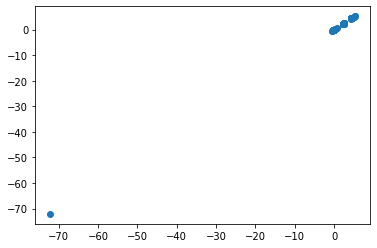

In [ ]:
plt.scatter(x=air_stations['coordinates.longitude'],
            y=air_stations['coordinates.longitude'])
plt.show()

no2 데이터와 pm25 데이터 합치기 - concat

In [ ]:
# air_quality_no2와 air_quality_pm25를 합치세요- concat

air_plus = pd.concat([air_long, air_quality])
air_plus

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
1105,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
1106,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1107,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1108,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [ ]:
# air_quality_no2와 air_quality_pm25를 합치세요 - merge
plus=pd.merge(air_long,air_quality, how='outer')
plus

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
3173,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
3174,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
3175,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
3176,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [ ]:
# 위 결과 데이터프레임과 stations 데이터프레임을 합치세요.
result = pd.merge(air_plus,air_stations)
result

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,48.83724,2.39390
1,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,48.83722,2.39390
2,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,48.83724,2.39390
3,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,48.83722,2.39390
4,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,48.83724,2.39390
...,...,...,...,...,...,...,...,...,...
4177,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³,51.49467,-0.13193
4178,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
4179,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
4180,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193


London의 NO2, PM25 농도 시간에 따른 변화를 시각화.

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4182 entries, 0 to 4181
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   4182 non-null   object 
 1   country                4182 non-null   object 
 2   date.utc               4182 non-null   object 
 3   location               4182 non-null   object 
 4   parameter              4182 non-null   object 
 5   value                  4182 non-null   float64
 6   unit                   4182 non-null   object 
 7   coordinates.latitude   4182 non-null   float64
 8   coordinates.longitude  4182 non-null   float64
dtypes: float64(3), object(6)
memory usage: 326.7+ KB


In [ ]:
# DataFrame에서 date.utc 컬럼의 데이터 타입을 'datetime64'타입으로 변환.
# 'datetime64' 타입(날짜와 시간을 편리하게 다룰 수 있는 데이터 타입)으로 변환.

result['date.utc']= result['date.utc'].astype('datetime64')

In [ ]:
# London 데이터만 선택
london = result[result['city'] == 'London']
london

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
2204,London,GB,2019-06-17 11:00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
2205,London,GB,2019-06-17 10:00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
2206,London,GB,2019-06-17 09:00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
2207,London,GB,2019-06-17 08:00:00,London Westminster,no2,13.0,µg/m³,51.49467,-0.13193
2208,London,GB,2019-06-17 07:00:00,London Westminster,no2,13.0,µg/m³,51.49467,-0.13193
...,...,...,...,...,...,...,...,...,...
4177,London,GB,2019-05-07 06:00:00,London Westminster,pm25,9.0,µg/m³,51.49467,-0.13193
4178,London,GB,2019-05-07 04:00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
4179,London,GB,2019-05-07 03:00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
4180,London,GB,2019-05-07 02:00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193


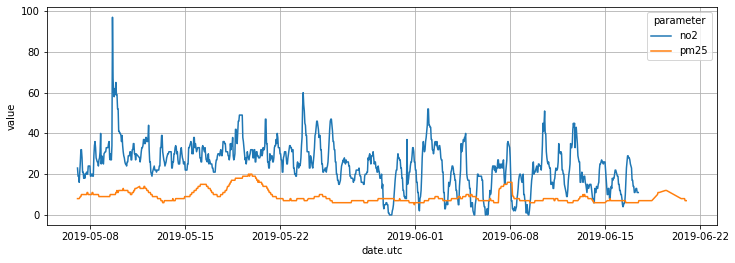

In [ ]:
plt.figure(figsize=(12,4))
sns.lineplot(x='date.utc', y='value', data=london, hue='parameter')
plt.grid
plt.show()

In [ ]:
# London, Paris의 NO2 농도의 시계열 그래프

subset = result[(result['parameter'] == 'no2') & 
                result['city'].isin(['London', 'Paris'])]
subset

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Paris,FR,2019-06-21 00:00:00,FR04014,no2,20.0,µg/m³,48.83724,2.39390
1,Paris,FR,2019-06-21 00:00:00,FR04014,no2,20.0,µg/m³,48.83722,2.39390
2,Paris,FR,2019-06-20 23:00:00,FR04014,no2,21.8,µg/m³,48.83724,2.39390
3,Paris,FR,2019-06-20 23:00:00,FR04014,no2,21.8,µg/m³,48.83722,2.39390
4,Paris,FR,2019-06-20 22:00:00,FR04014,no2,26.5,µg/m³,48.83724,2.39390
...,...,...,...,...,...,...,...,...,...
3168,London,GB,2019-05-07 06:00:00,London Westminster,no2,26.0,µg/m³,51.49467,-0.13193
3169,London,GB,2019-05-07 04:00:00,London Westminster,no2,16.0,µg/m³,51.49467,-0.13193
3170,London,GB,2019-05-07 03:00:00,London Westminster,no2,19.0,µg/m³,51.49467,-0.13193
3171,London,GB,2019-05-07 02:00:00,London Westminster,no2,19.0,µg/m³,51.49467,-0.13193


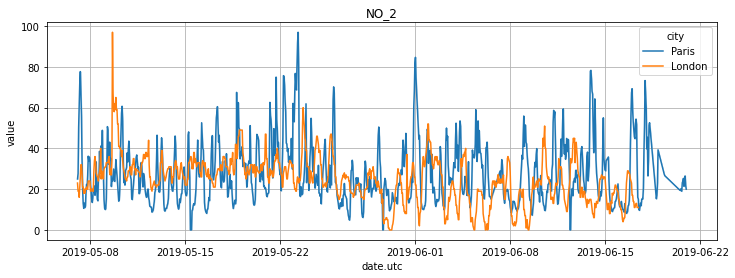

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(x='date.utc', y='value', hue='city', data=subset)
plt.grid()
plt.title('NO_2')
plt.show()

# babynames 데이터셋

* https://github.com/wesm/pydata-book/tree/2nd-edition/datasets/babynames 데이터 파일들을 이용.
* 1880년부터 2010년까지 미국 신생아들의 이름,성별,출생자수가 정리된 파일들.
* 파일을 하나씩 읽어서 데이터 프레임을 생성.
* 각 데이터 프레임에 연도 컬럼을 추가.
* 생성된 131개의 데이터 프레임을 하나로 합침.
* 연도별 신생아 숫자를 찾고 시각화.
* 연도별 성별 신생아 숫자를 찾고 시각화.

In [ ]:
path_data = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/babynames'

In [ ]:
yobs=[] # 각 연도의 데이터 프레임들을 저장할 리스트
for year in range(1880, 2011): # 1880~2010년까지 반복하면서
    #txt 파일이 저장된 경로
    file_path = f'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/babynames/yob{year}.txt'
    # 파일을 읽어서 DataFrmae생성
    yob_year = pd.read_csv(file_path, names=['name','gender','births'])
    # DataFrame 연도(year) 컬럼을 추가
    yob_year['year']= year
    # DataFrame을 리스트에 추가
    yobs.append(yob_year)

In [ ]:
len(yobs)

131

In [ ]:
yobs[0] #> 데이터프레임을 갖고 있는 리스트 =  1880년 DataFrame을 갖고있는 list

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880


In [ ]:
yobs[-1] # > 2010년 DataFrame을 갖고있는 list

,name,gender,births,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


In [ ]:
# 131개의 DataFrame을 이어붙이기
yob_df = pd.concat(yobs)

In [ ]:
yob_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690784 entries, 0 to 33837
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   gender  1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 64.5+ MB


In [ ]:
yob_df.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:
yob_df.tail()

,name,gender,births,year
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010
33837,Zzyzx,M,5,2010


In [ ]:
# 연도별 신생아숫자
births_by_year = yob_df.groupby('year')['births'].sum()
births_by_year #>Series

year
1880     201486
1881     192703
1882     221538
1883     216954
1884     243466
         ...   
2006    3946702
2007    3986130
2008    3915955
2009    3801002
2010    3657392
Name: births, Length: 131, dtype: int64

In [ ]:
# groupby 결과 Series의 인덱스를 컬럼으로 reset
births_by_year = births_by_year.reset_index()
births_by_year #> DataFrame

,year,births
0,1880,201486
1,1881,192703
2,1882,221538
3,1883,216954
4,1884,243466
...,...,...
126,2006,3946702
127,2007,3986130
128,2008,3915955
129,2009,3801002


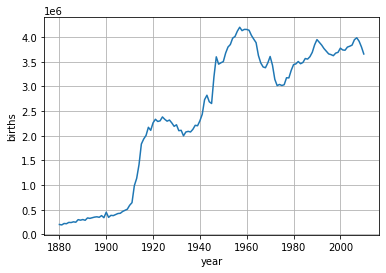

In [ ]:
sns.lineplot(x='year', y='births', data=births_by_year)
plt.grid()
plt.show()

In [ ]:
# 연도별 성별 신생아 별 숫자
gen_births = yob_df.groupby(by=['year','gender'])['births'].sum()
gen_births #> MultiIndex를 갖는 Series

year  gender
1880  F           90993
      M          110493
1881  F           91955
      M          100748
1882  F          107851
                 ...   
2008  M         2032310
2009  F         1827643
      M         1973359
2010  F         1759010
      M         1898382
Name: births, Length: 262, dtype: int64

In [ ]:
gen_briths = gen_births.reset_index()
gen_briths

,year,gender,births
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851
...,...,...,...
257,2008,M,2032310
258,2009,F,1827643
259,2009,M,1973359
260,2010,F,1759010


In [ ]:
gen_births.reset_index(level=0)
# level 파라미터를 지정하지 않으면, MultiIndex 모두 컬럼으로 변환.

,year,births
gender,,
F,1880,90993
M,1880,110493
F,1881,91955
M,1881,100748
F,1882,107851
...,...,...
M,2008,2032310
F,2009,1827643
M,2009,1973359


In [ ]:
gen_births.reset_index(level=1)
# level 파라미터를 지정하면 지정한 인덱스만 컬럼으로 변환.
# level의 순서는 0,1,2,...

,gender,births
year,,
1880,F,90993
1880,M,110493
1881,F,91955
1881,M,100748
1882,F,107851
...,...,...
2008,M,2032310
2009,F,1827643
2009,M,1973359


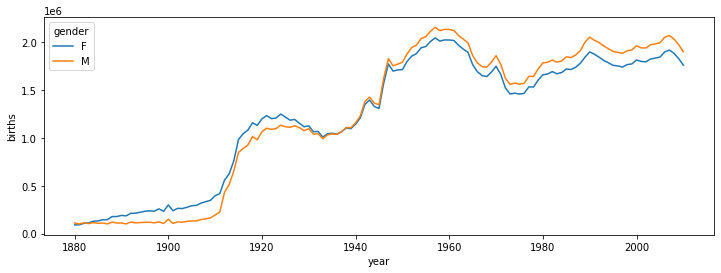

In [ ]:
plt.figure(figsize=(12, 4))
sns.lineplot(x='year', y='births',hue='gender', data=gen_briths)
plt.show()

# 중복 데이터 제거

In [ ]:
station_data = 'https://github.com/pandas-dev/pandas/raw/main/doc/data/air_quality_stations.csv'

In [ ]:
station = pd.read_csv(station_data)
station

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226
...,...,...,...
61,Southend-on-Sea,51.54420,0.67841
62,Southwark A2 Old Kent Road,51.48050,-0.05955
63,Thurrock,51.47707,0.31797
64,Tower Hamlets Roadside,51.52253,-0.04216


In [ ]:
len(station) #> DataFrame의 row 개수

66

In [ ]:
locations = station['location'].unique()

In [ ]:
len(locations)

58

## DataFrame에서 중복된 값 찾기

In [ ]:
station.duplicated('location') #> boolean Series

0     False
1     False
2     False
3     False
4     False
      ...  
61    False
62    False
63    False
64    False
65    False
Length: 66, dtype: bool

In [ ]:
station[station.duplicated('location')]
#> 중복된 값이 있을 때 나중에 나오는 값을 중복된 값으로 처리. 

,location,coordinates.latitude,coordinates.longitude
27,FR04014,48.83722,2.39390
29,FR04031,48.86889,2.31194
33,FR04071,48.85639,2.33528
35,FR04118,48.87029,2.33250
38,FR04135,48.83796,2.40806
40,FR04141,48.85279,2.36056
42,FR04143,48.85944,2.35111
45,FR04329,48.83862,2.41278


In [ ]:
station.iloc[26:30]

,location,coordinates.latitude,coordinates.longitude
26,FR04014,48.83724,2.39390
27,FR04014,48.83722,2.39390
28,FR04031,48.86887,2.31194
29,FR04031,48.86889,2.31194


In [ ]:
station[station.duplicated('location', keep='first')]
# > 중복된 값이 있을 때 처음에 나오는 값은 df에 유지 (keep), 나중에 나오는 값은 중복된 값으로 처리

,location,coordinates.latitude,coordinates.longitude
27,FR04014,48.83722,2.39390
29,FR04031,48.86889,2.31194
33,FR04071,48.85639,2.33528
35,FR04118,48.87029,2.33250
38,FR04135,48.83796,2.40806
40,FR04141,48.85279,2.36056
42,FR04143,48.85944,2.35111
45,FR04329,48.83862,2.41278


In [ ]:
station[station.duplicated('location', keep='last')]
#> 중복된 값이 있을 때 처음에 나오는 값을 중복된 값으로 처리, 나중에 나오는 값은 유지

,location,coordinates.latitude,coordinates.longitude
26,FR04014,48.83724,2.39390
28,FR04031,48.86887,2.31194
32,FR04071,48.85640,2.33528
34,FR04118,48.87027,2.33250
37,FR04135,48.83795,2.40806
39,FR04141,48.85278,2.36056
41,FR04143,48.85900,2.35100
44,FR04329,48.83860,2.41279


In [ ]:
station[station.duplicated('location', keep=False)]
# > 중복된 모든 값을 모두 나오게 처리.

## 중복된 값 제거

In [ ]:
df = station.drop_duplicates('location')
df #> 중복된 값들 중에서 나중에 나오는 값들이 삭제 (drop)된 데이터 프레임